In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")
    
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Part 1

### Part 1.2

Part 1.1 was unnecessary since the original data only had numerical values.

In [3]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [4]:
af_data_temp = af_data.values
af_data_scaled = min_max_scaler.fit_transform(af_data_temp)
af_data_norm = pd.DataFrame(af_data_scaled,columns=af_data.columns)

In [5]:
af_data_norm.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [6]:
af_data_norm.describe()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,0.135676,0.305509,0.397810,0.483857,0.185125,0.570531
std,0.159221,0.266582,0.334791,0.393252,0.226687,0.183441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030303,0.090090,0.090909,0.199495,0.036794,0.447018
50%,0.070707,0.243243,0.272727,0.199495,0.078550,0.594065
75%,0.191919,0.445946,0.727273,1.000000,0.261594,0.707727
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
af_data_column_order_std = af_data_norm.std().sort_values(ascending=False).index
af_data_std = af_data_norm[af_data_column_order_std]

In [8]:
af_data_std.head()

,Free-stream Velocity (m/s),Chord Length (m),Angle of Attack (degrees),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Frequency (Hz)
0,1.0,1.0,0.0,0.039005,0.606829,0.030303
1,1.0,1.0,0.0,0.039005,0.580238,0.040404
2,1.0,1.0,0.0,0.039005,0.600181,0.053030
3,1.0,1.0,0.0,0.039005,0.643790,0.070707
4,1.0,1.0,0.0,0.039005,0.640333,0.090909


### Part 1.3

In [9]:
af_data_sub1 = af_data_std.iloc[:, 0:2].copy()

In [10]:
af_data_sub1.head()

,Free-stream Velocity (m/s),Chord Length (m)
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


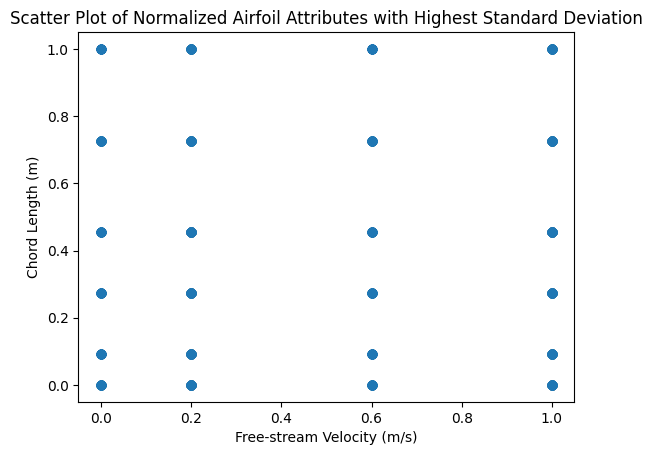

In [11]:
plt.scatter(af_data_sub1.iloc[:,0],af_data_sub1.iloc[:,1])
plt.xlabel(af_data_sub1.columns[0])
plt.ylabel(af_data_sub1.columns[1])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Highest Standard Deviation');

Random question I thought up: Why would I want to work with a subset when I can just call the columns I want to use instead of making an all new data frame for it? Down below I did multiple other scatter plots by using the original data frame and called the columns I wanted. It seemed much easier and faster than making multiple subset data frames, so is there a reason or time where a subset may be preferred over what I did?

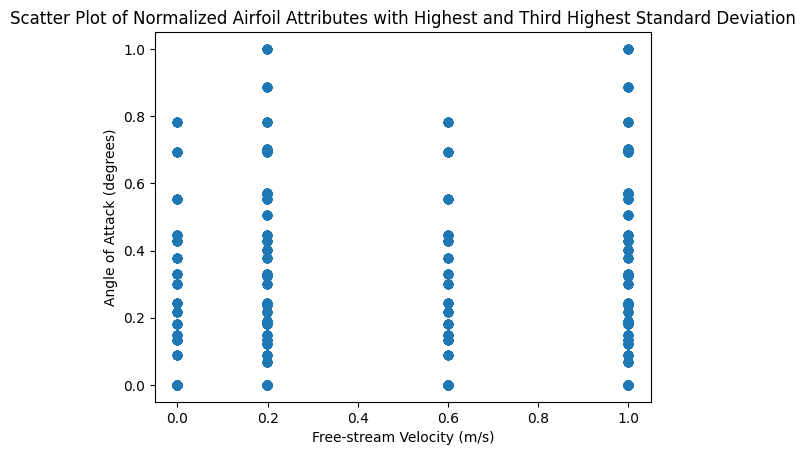

In [12]:
plt.scatter(af_data_std.iloc[:,0],af_data_std.iloc[:,2])
plt.xlabel(af_data_std.columns[0])
plt.ylabel(af_data_std.columns[2])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Highest and Third Highest Standard Deviation');

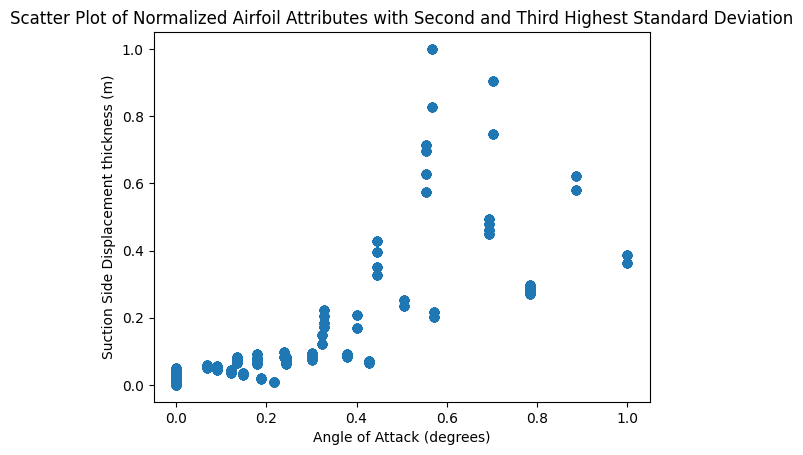

In [13]:
plt.scatter(af_data_std.iloc[:,2],af_data_std.iloc[:,3])
plt.xlabel(af_data_std.columns[2])
plt.ylabel(af_data_std.columns[3])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Second and Third Highest Standard Deviation');

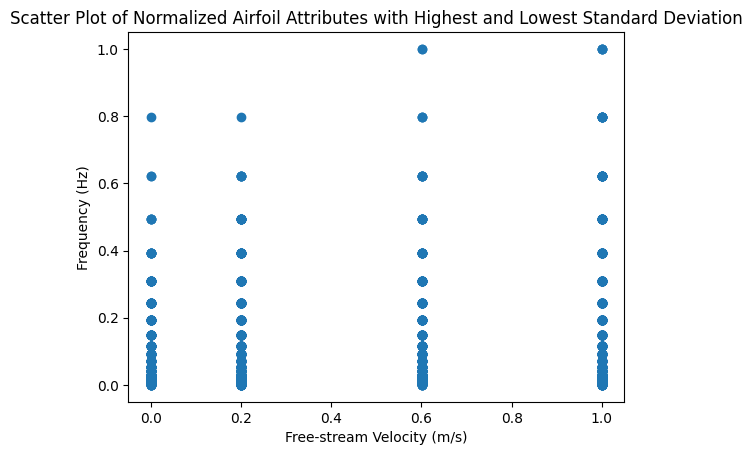

In [14]:
plt.scatter(af_data_std.iloc[:,0],af_data_std.iloc[:,5])
plt.xlabel(af_data_std.columns[0])
plt.ylabel(af_data_std.columns[5])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Highest and Lowest Standard Deviation');

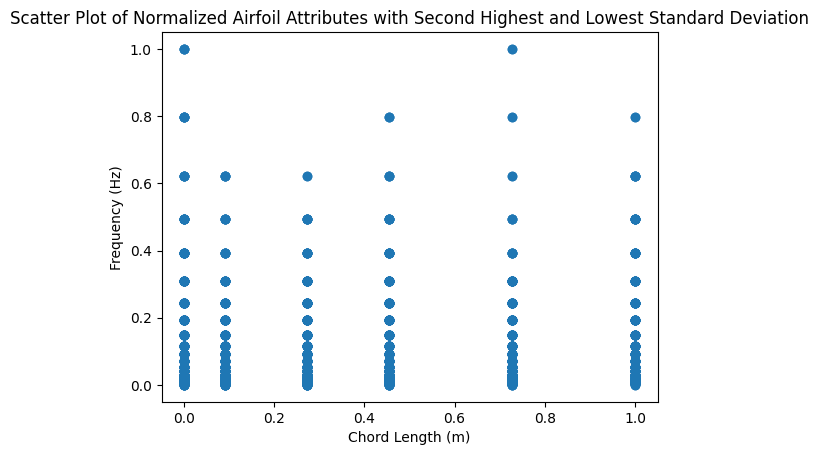

In [15]:
plt.scatter(af_data_std.iloc[:,1],af_data_std.iloc[:,5])
plt.xlabel(af_data_std.columns[1])
plt.ylabel(af_data_std.columns[5])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Second Highest and Lowest Standard Deviation');

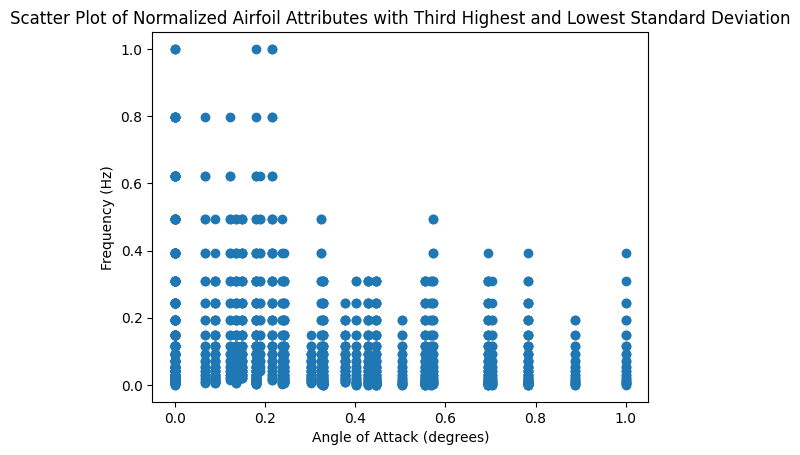

In [16]:
plt.scatter(af_data_std.iloc[:,2],af_data_std.iloc[:,5])
plt.xlabel(af_data_std.columns[2])
plt.ylabel(af_data_std.columns[5])
plt.title('Scatter Plot of Normalized Airfoil Attributes with Third Highest and Lowest Standard Deviation');

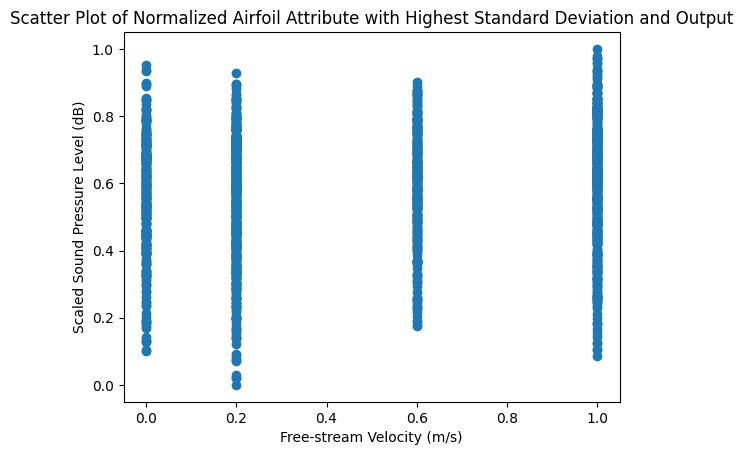

In [17]:
plt.scatter(af_data_std.iloc[:,0],af_data_std.iloc[:,4])
plt.xlabel(af_data_std.columns[0])
plt.ylabel(af_data_std.columns[4])
plt.title('Scatter Plot of Normalized Airfoil Attribute with Highest Standard Deviation and Output');

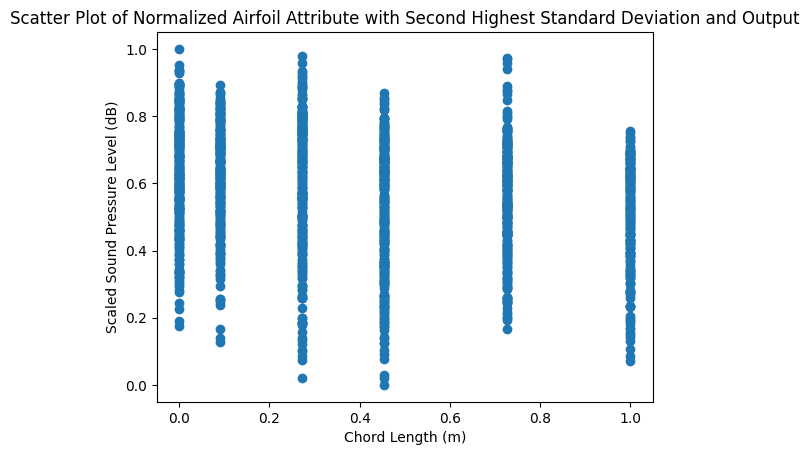

In [18]:
plt.scatter(af_data_std.iloc[:,1],af_data_std.iloc[:,4])
plt.xlabel(af_data_std.columns[1])
plt.ylabel(af_data_std.columns[4])
plt.title('Scatter Plot of Normalized Airfoil Attribute with Second Highest Standard Deviation and Output');

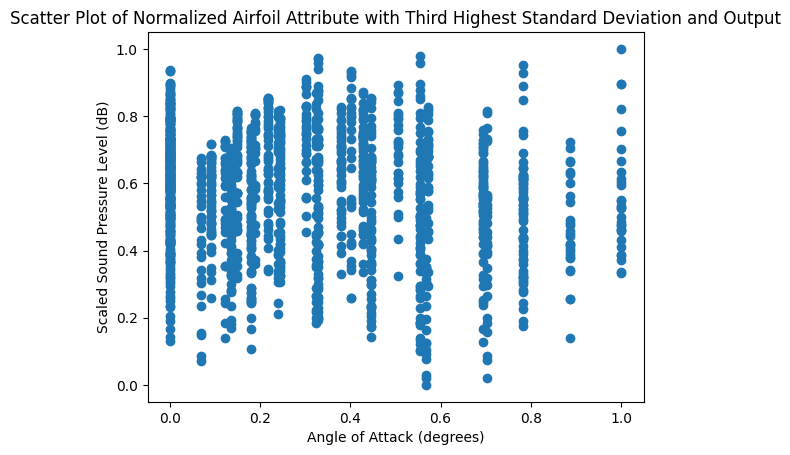

In [19]:
plt.scatter(af_data_std.iloc[:,2],af_data_std.iloc[:,4])
plt.xlabel(af_data_std.columns[2])
plt.ylabel(af_data_std.columns[4])
plt.title('Scatter Plot of Normalized Airfoil Attribute with Third Highest Standard Deviation and Output');

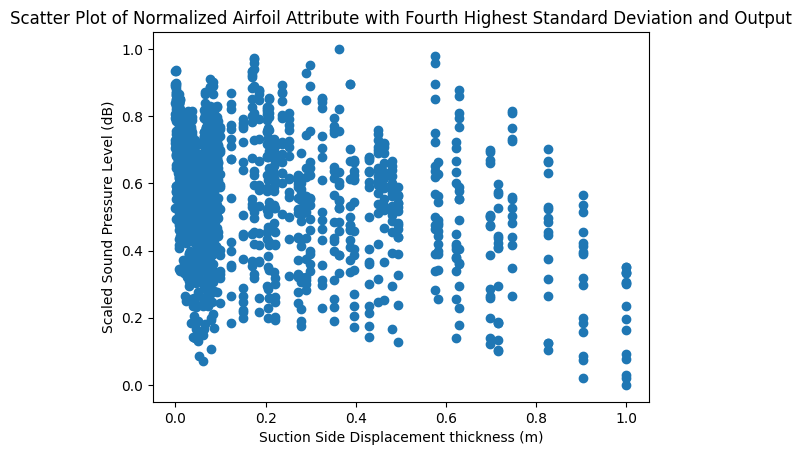

In [20]:
plt.scatter(af_data_std.iloc[:,3],af_data_std.iloc[:,4])
plt.xlabel(af_data_std.columns[3])
plt.ylabel(af_data_std.columns[4])
plt.title('Scatter Plot of Normalized Airfoil Attribute with Fourth Highest Standard Deviation and Output');

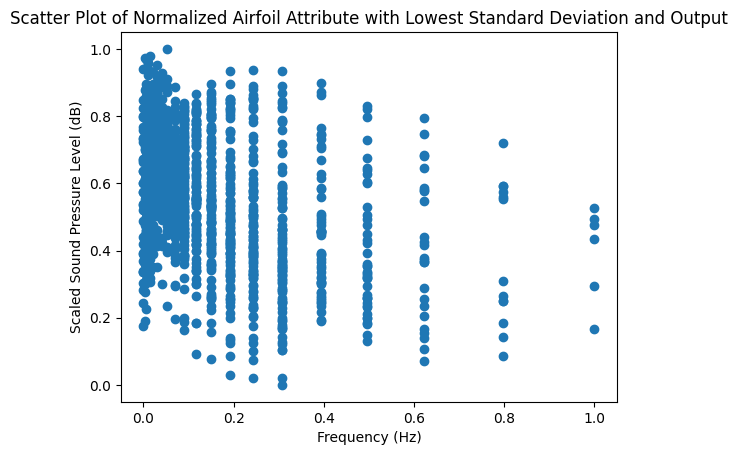

In [21]:
plt.scatter(af_data_std.iloc[:,5],af_data_std.iloc[:,4])
plt.xlabel(af_data_std.columns[5])
plt.ylabel(af_data_std.columns[4])
plt.title('Scatter Plot of Normalized Airfoil Attribute with Lowest Standard Deviation and Output');

I have attached a few scatter plots just to get a feel for the data. Specifically, I plotted all of the input variables with the output because I know I wanted to perform linear regression. Looking at some of the plots has me thinking the linear regression may not be super informative for some variables (though that may not be a bad thing).

An idea I will probably implement, or at least experiment with, will be splitting the data based on the output (split by decibel level) and then looking at the data that way as well. Depending on where I go with the project, that experimentation may get thrown in or may not, but it will happen.

### Part 1.4

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

I want to perform PCA, but I notice that the IRIS data set in the lab ignores the label, which means it is only focused on input variables. Considering that, I will do PCA on my data, but without the output.

In [23]:
af_data_inputs = af_data_std.drop(columns=['Scaled Sound Pressure Level (dB)'])
af_data_inputs.head()

,Free-stream Velocity (m/s),Chord Length (m),Angle of Attack (degrees),Suction Side Displacement thickness (m),Frequency (Hz)
0,1.0,1.0,0.0,0.039005,0.030303
1,1.0,1.0,0.0,0.039005,0.040404
2,1.0,1.0,0.0,0.039005,0.053030
3,1.0,1.0,0.0,0.039005,0.070707
4,1.0,1.0,0.0,0.039005,0.090909


Explained Variance =  [0.15890876 0.15365079]
Principal Components =  [[ 0.57489037 -0.57769261  0.49527283  0.29977781 -0.02470637]
 [ 0.81485989  0.43034054 -0.30733744 -0.21784126  0.09433587]]


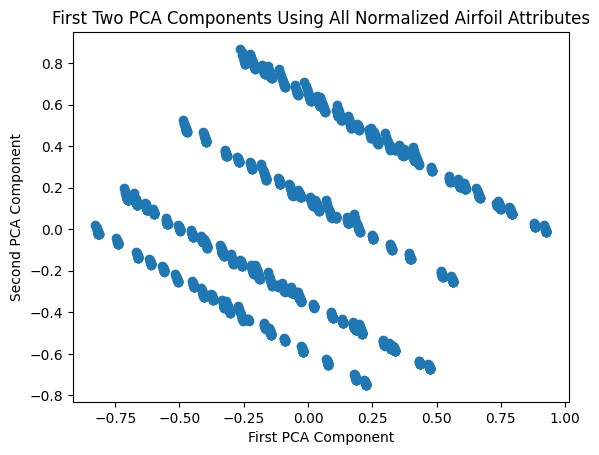

In [24]:
# PCA on the entire list of feautres

# Separating out the features
X_af = af_data_inputs.values

# Transform data set
pca_af = PCA(n_components=2).fit_transform(X_af)

# Take a look at the PCA vectors
print('Explained Variance = ', PCA(n_components=2).fit(X_af).explained_variance_)
print('Principal Components = ', PCA(n_components=2).fit(X_af).components_)

# Turn this back into a data frame
pca_af_full = pd.DataFrame(data = pca_af)

# Plot these components in a scatter plot.
plt.scatter(pca_af_full.iloc[:,0],pca_af_full.iloc[:,1])
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.title('First Two PCA Components Using All Normalized Airfoil Attributes');

Explained Variance =  [0.15465308 0.11207947]
Principal Components =  [[ 0.99993143  0.01171082]
 [-0.01171082  0.99993143]]


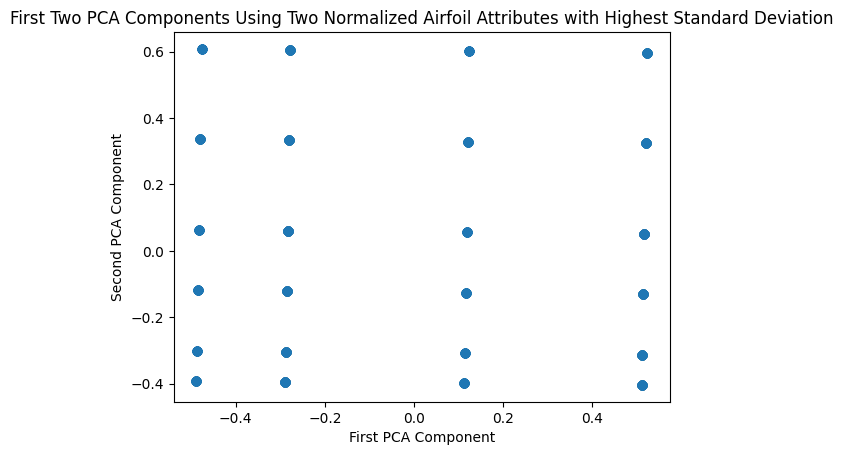

In [25]:
# PCA on the two most important features.

# Separating out the features
X2_af = af_data_sub1.values

# Transform data set
pca2_af = PCA(n_components=2).fit_transform(X2_af)

# Take a look at the PCA vectors
print('Explained Variance = ', PCA(n_components=2).fit(X2_af).explained_variance_)
print('Principal Components = ', PCA(n_components=2).fit(X2_af).components_)

# Turn this back into a data frame
pca_af_sub = pd.DataFrame(data = pca2_af)

# Plot these components in a scatter plot.
plt.scatter(pca_af_sub.iloc[:,0],pca_af_sub.iloc[:,1])
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.title('First Two PCA Components Using Two Normalized Airfoil Attributes with Highest Standard Deviation');

## Part 2

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

I was hoping this data would be good for linear regression. Some of the scatter plots earlier make me feel less optimistic about it; however, here in the linear regression section I will do what I suggested in a previous comment. I'll give categories to my data (as I did in lab 2, but I'll probably create categories a little differently than before based off of what I think is realistic, not what previous labs may have suggested).

In [27]:
def Category(x):
    if x >= 120  :
        return "Not Safe"
    else:
        return"Safe"

In [28]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Not Safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Not Safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Not Safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Not Safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Not Safe


In [31]:
af_safe = af_data.loc[af_data['Categorized Sound Level'] == 'Safe']
af_safe.shape

(360, 7)

In [32]:
af_notsafe = af_data.loc[af_data['Categorized Sound Level'] == 'Not Safe']
af_notsafe.shape

(1143, 7)

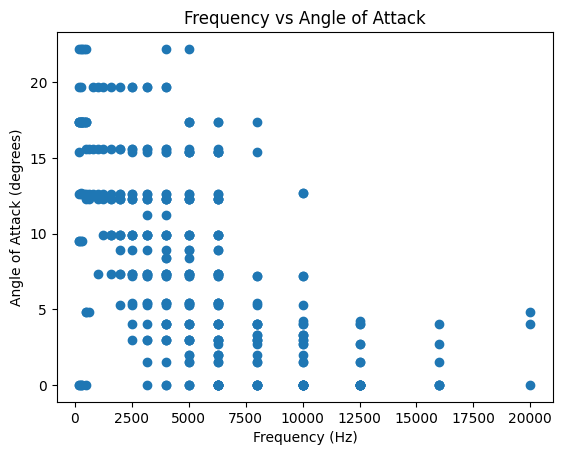

In [34]:
plt.scatter(af_safe['Frequency (Hz)'], af_safe['Angle of Attack (degrees)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Angle of Attack (degrees)')
plt.title('Frequency vs Angle of Attack');

Instead of doing a bunch of scatter plots, I'm going to do a pairplot like in lab 2 so I can have a better feel for the data and what may be good for linear regression.

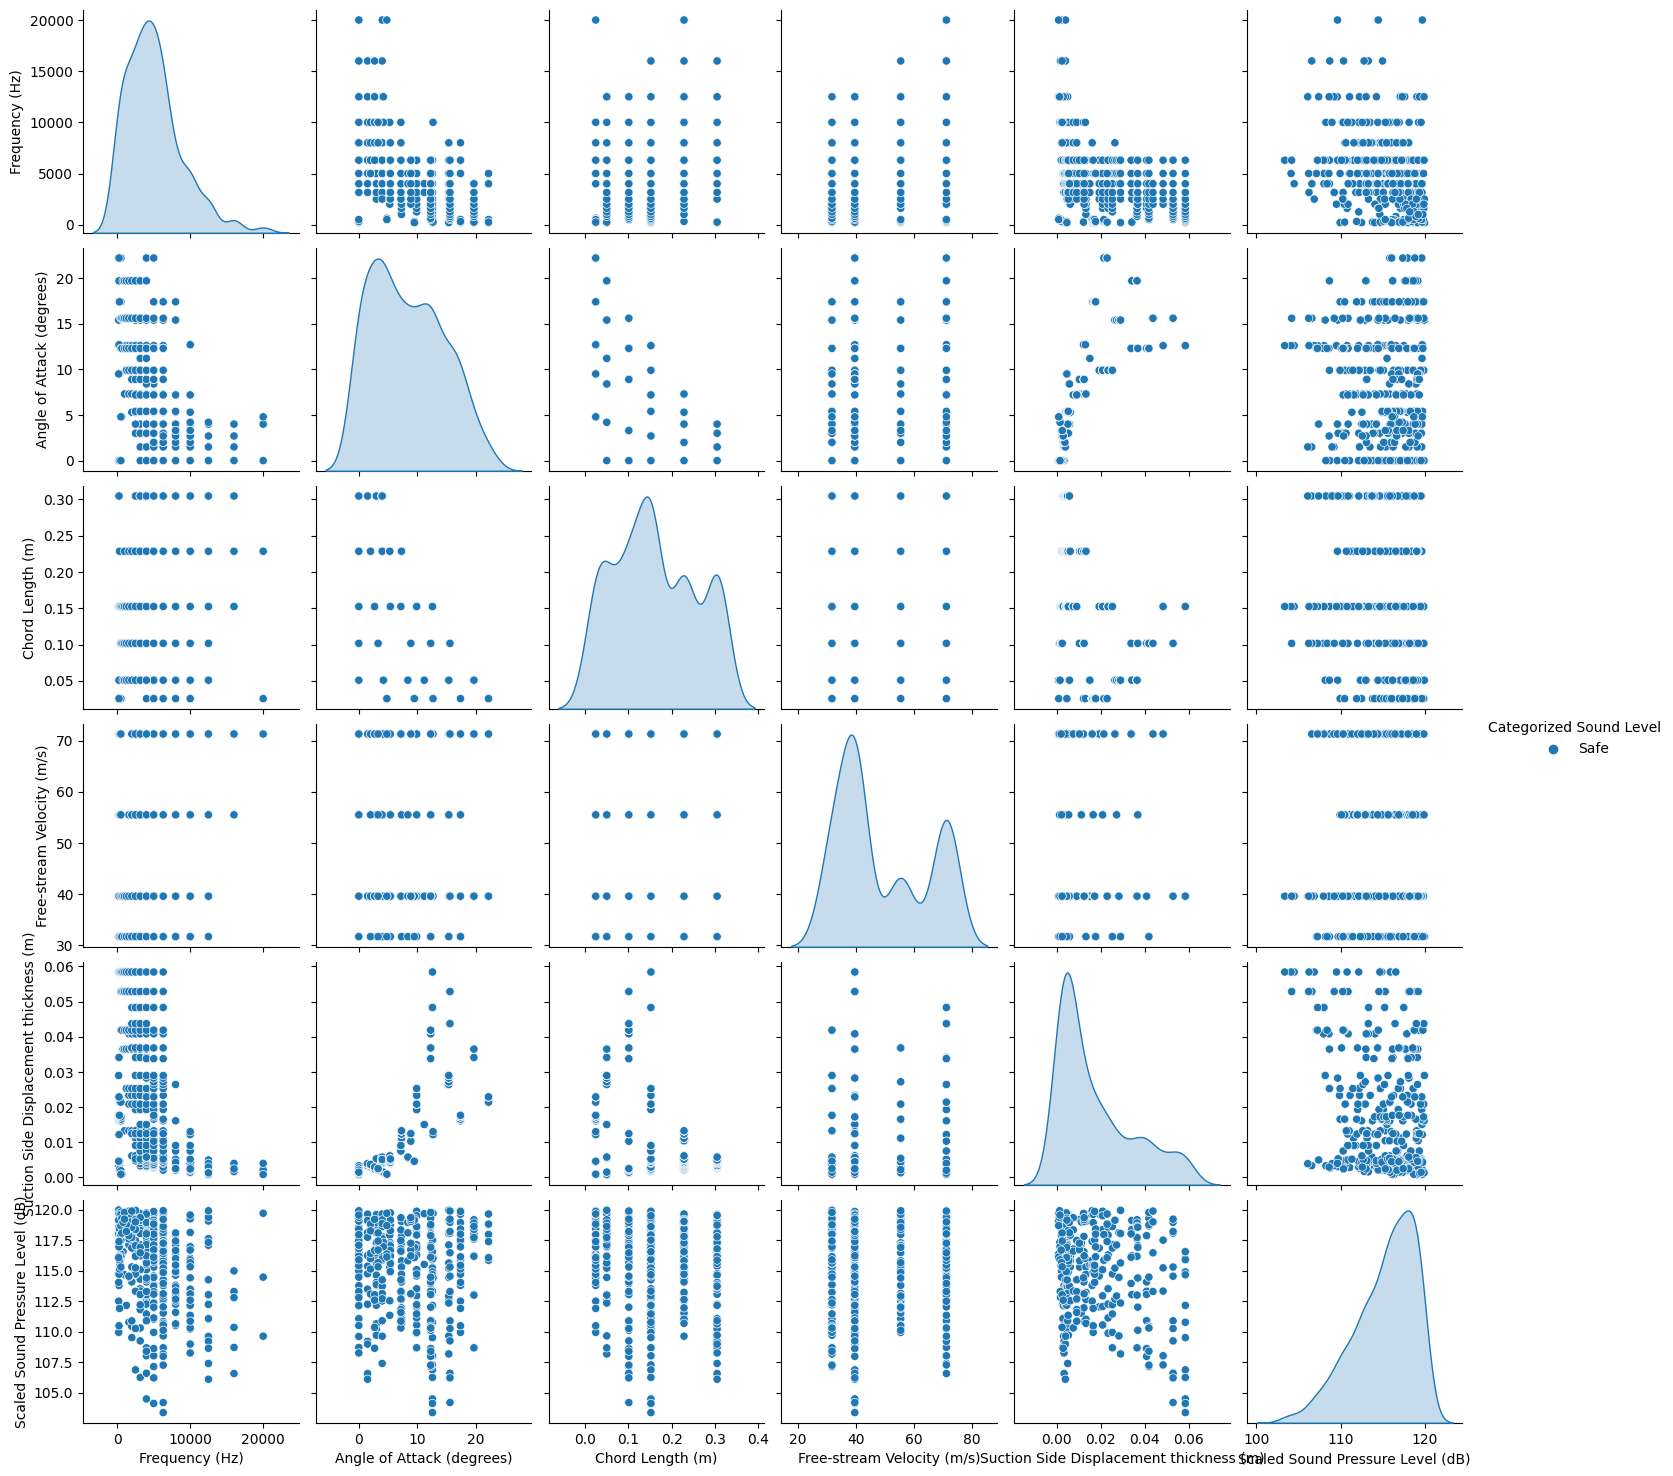

In [35]:
sns.pairplot(af_safe, hue='Categorized Sound Level');

You can see that some of these plots may be give us something useful for linear regression, others probably not.

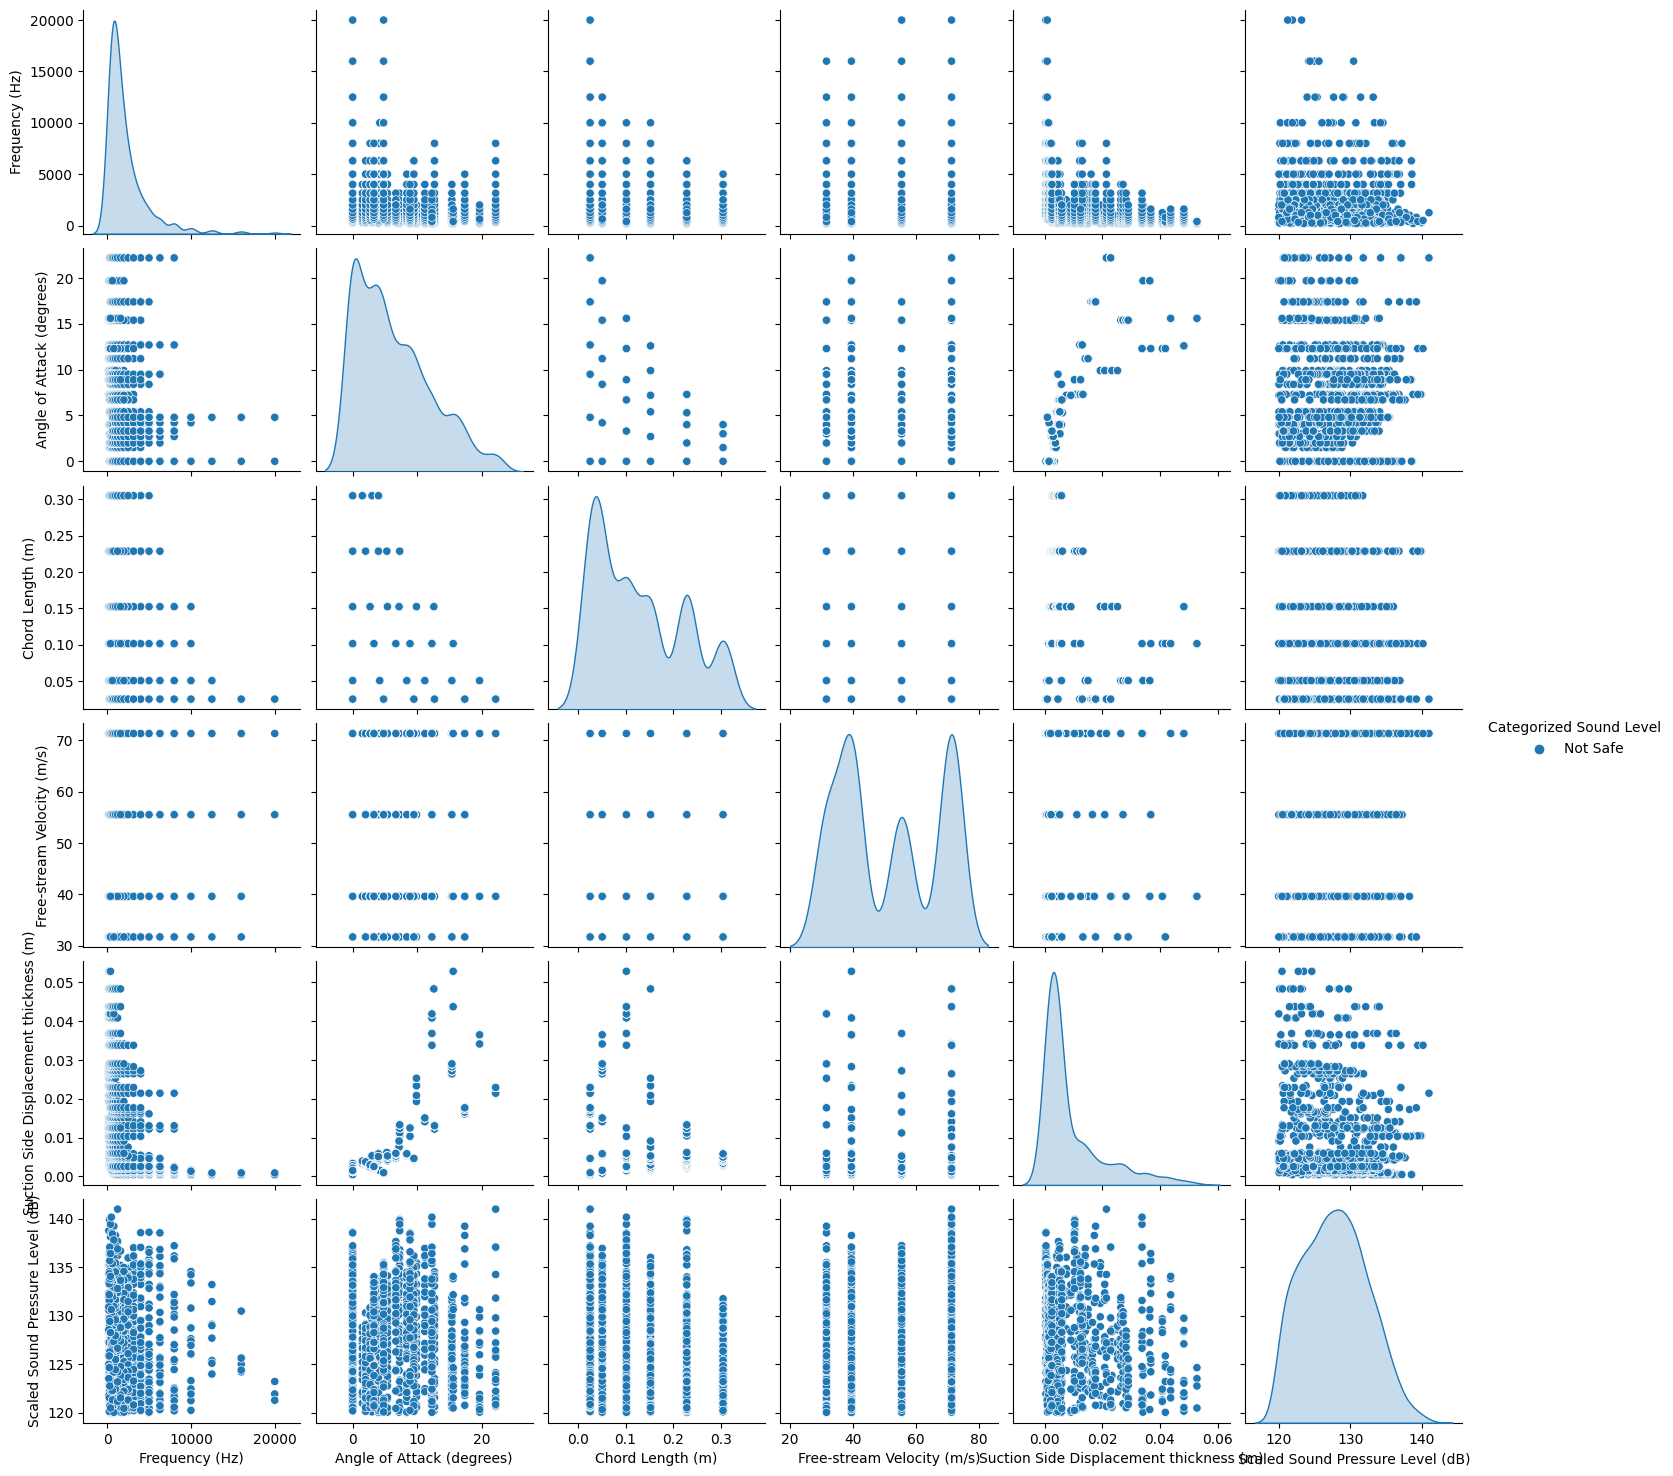

In [37]:
sns.pairplot(af_notsafe, hue = 'Categorized Sound Level'):

Same issue as with the safe data set. Some of the plots probably won't be helpful for linear regression, but a couple may be ok.

### Part 2.1

I am going to do linear regression for all of the data that looks good for regression by inspection and for all inputs versus the output (for both the safe and not safe data sets).

#### <u>Safe</u>

In [38]:
X1_safe = af_safe['Angle of Attack (degrees)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y1_safe = af_safe['Frequency (Hz)'].values.reshape(-1,1)

reg_safe = LinearRegression()
reg_safe.fit(X1_safe, Y1_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_safe.intercept_[0], reg_safe.coef_[0][0]))

The linear model is: Y = 7976.6 + -353.51X


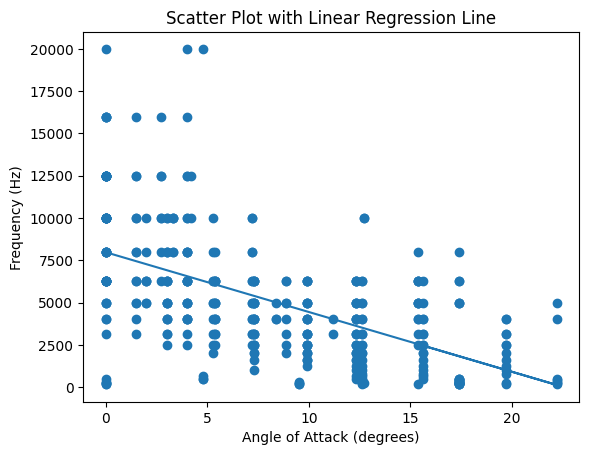

In [39]:
plt.scatter(X1_safe,Y1_safe)
plt.plot(X1_safe,reg_safe.predict(X1_safe))
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Frequency (Hz)')
plt.title('Scatter Plot with Linear Regression Line');

In [42]:
X2_safe = af_safe['Suction Side Displacement thickness (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y2_safe = af_safe['Frequency (Hz)'].values.reshape(-1,1)

reg2_safe = LinearRegression()
reg2_safe.fit(X2_safe, Y2_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg2_safe.intercept_[0], reg2_safe.coef_[0][0]))

The linear model is: Y = 6853.9 + -1.0493e+05X


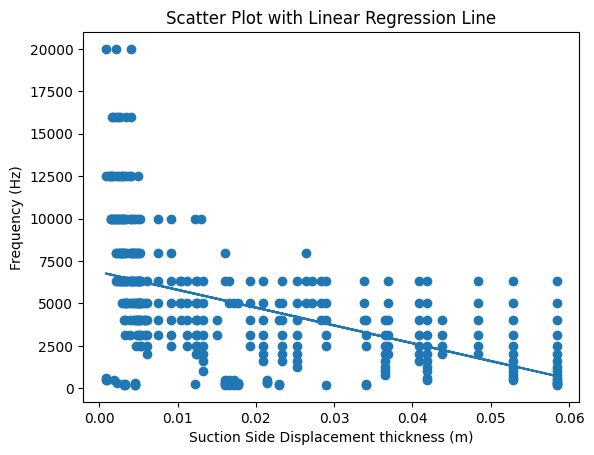

In [43]:
plt.scatter(X2_safe,Y2_safe)
plt.plot(X2_safe,reg2_safe.predict(X2_safe))
plt.xlabel('Suction Side Displacement thickness (m)')
plt.ylabel('Frequency (Hz)')
plt.title('Scatter Plot with Linear Regression Line');

In [44]:
X3_safe = af_safe['Suction Side Displacement thickness (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y3_safe = af_safe['Angle of Attack (degrees)'].values.reshape(-1,1)

reg3_safe = LinearRegression()
reg3_safe.fit(X3_safe, Y3_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg3_safe.intercept_[0], reg3_safe.coef_[0][0]))

The linear model is: Y = 3.8121 + 260.24X


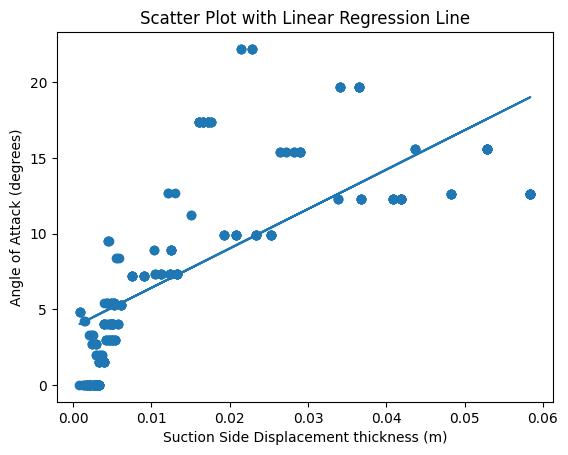

In [45]:
plt.scatter(X3_safe,Y3_safe)
plt.plot(X3_safe,reg3_safe.predict(X3_safe))
plt.xlabel('Suction Side Displacement thickness (m)')
plt.ylabel('Angle of Attack (degrees)')
plt.title('Scatter Plot with Linear Regression Line');

I'm honestly not too sure how helpful these plots will be for me, so I don't think I'll look at inputs vs inputs anymore when I get to the not safe data. However, I do still want to look at all of the input vs output data for both the safe and not safe data.

Before I do that, I will point out that I think this shows a correlation between suction side displacement thickness and the angle of attack. This is something important to take note of for trying multivariable regression because I think the correlation between the two may cause issues.

In [52]:
X4_safe = af_safe['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y4_safe = af_safe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg4_safe = LinearRegression()
reg4_safe.fit(X4_safe, Y4_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg4_safe.intercept_[0], reg4_safe.coef_[0][0]))

The linear model is: Y = 116.64 + -0.00028368X


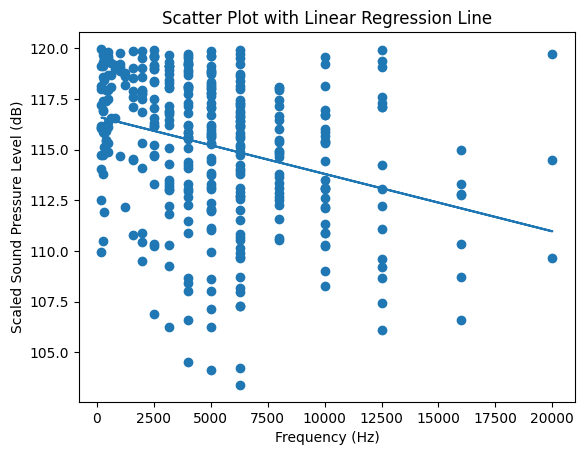

In [53]:
plt.scatter(X4_safe,Y4_safe)
plt.plot(X4_safe,reg4_safe.predict(X4_safe))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [54]:
X5_safe = af_safe['Angle of Attack (degrees)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y5_safe = af_safe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg5_safe = LinearRegression()
reg5_safe.fit(X5_safe, Y5_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg5_safe.intercept_[0], reg5_safe.coef_[0][0]))

The linear model is: Y = 115.56 + -0.041838X


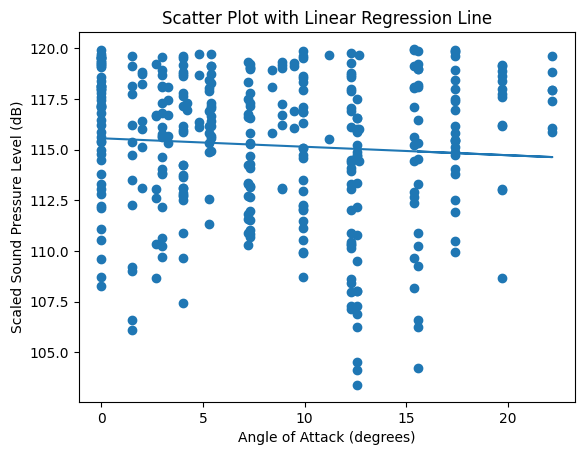

In [58]:
plt.scatter(X5_safe,Y5_safe)
plt.plot(X5_safe,reg5_safe.predict(X5_safe))
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [55]:
X6_safe = af_safe['Chord Length (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y6_safe = af_safe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg6_safe = LinearRegression()
reg6_safe.fit(X6_safe, Y6_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg6_safe.intercept_[0], reg6_safe.coef_[0][0]))

The linear model is: Y = 115.75 + -3.3383X


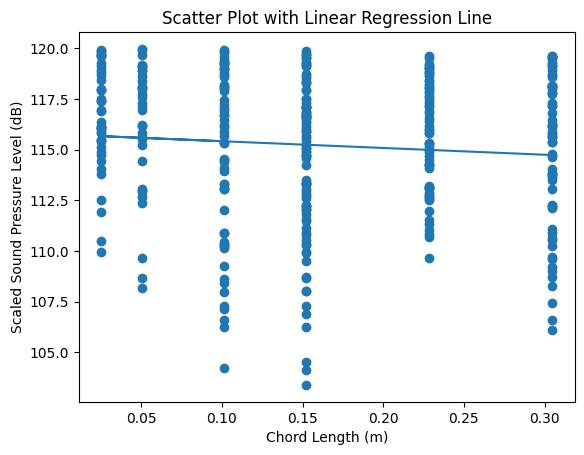

In [59]:
plt.scatter(X6_safe,Y6_safe)
plt.plot(X6_safe,reg6_safe.predict(X6_safe))
plt.xlabel('Chord Length (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [56]:
X7_safe = af_safe['Free-stream Velocity (m/s)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y7_safe = af_safe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg7_safe = LinearRegression()
reg7_safe.fit(X7_safe, Y7_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg7_safe.intercept_[0], reg7_safe.coef_[0][0]))

The linear model is: Y = 114.7 + 0.010428X


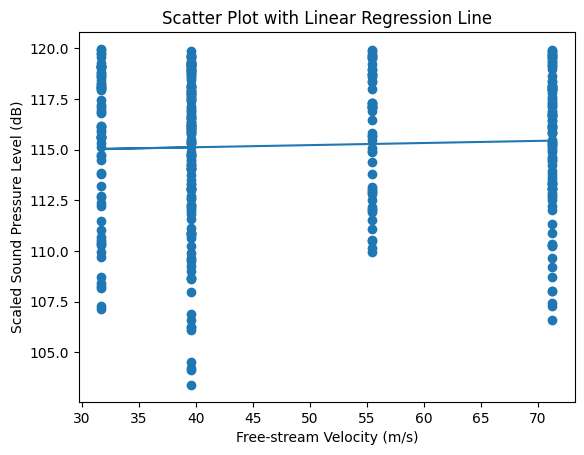

In [60]:
plt.scatter(X7_safe,Y7_safe)
plt.plot(X7_safe,reg7_safe.predict(X7_safe))
plt.xlabel('Free-stream Velocity (m/s)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [57]:
X8_safe = af_safe['Suction Side Displacement thickness (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y8_safe = af_safe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg8_safe = LinearRegression()
reg8_safe.fit(X8_safe, Y8_safe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg8_safe.intercept_[0], reg8_safe.coef_[0][0]))

The linear model is: Y = 116.28 + -61.174X


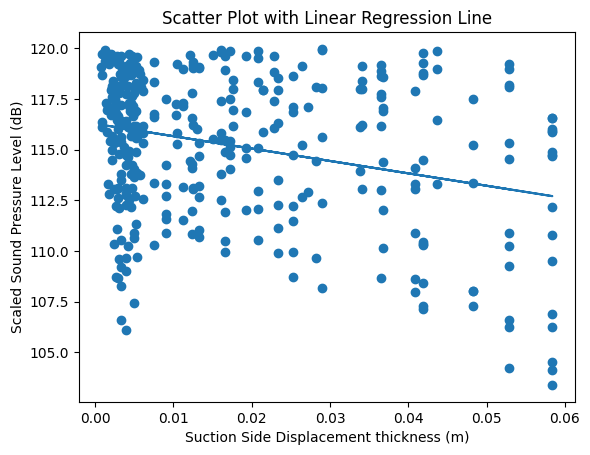

In [61]:
plt.scatter(X8_safe,Y8_safe)
plt.plot(X8_safe,reg8_safe.predict(X8_safe))
plt.xlabel('Suction Side Displacement thickness (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

#### <u>Not Safe</u>

In [62]:
X1_notsafe = af_notsafe['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y1_notsafe = af_notsafe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg1_notsafe = LinearRegression()
reg1_notsafe.fit(X1_notsafe, Y1_notsafe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg1_notsafe.intercept_[0], reg1_notsafe.coef_[0][0]))

The linear model is: Y = 128.31 + -0.00020212X


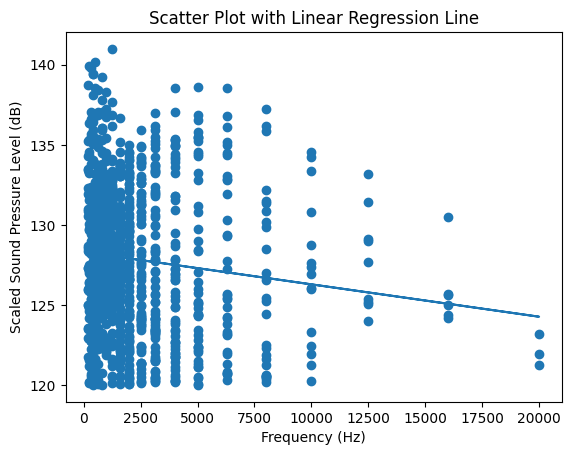

In [68]:
plt.scatter(X1_notsafe,Y1_notsafe)
plt.plot(X1_notsafe,reg1_notsafe.predict(X1_notsafe))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [64]:
X2_notsafe = af_notsafe['Angle of Attack (degrees)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y2_notsafe = af_notsafe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg2_notsafe = LinearRegression()
reg2_notsafe.fit(X2_notsafe, Y2_notsafe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg2_notsafe.intercept_[0], reg2_notsafe.coef_[0][0]))

The linear model is: Y = 128.18 + -0.050469X


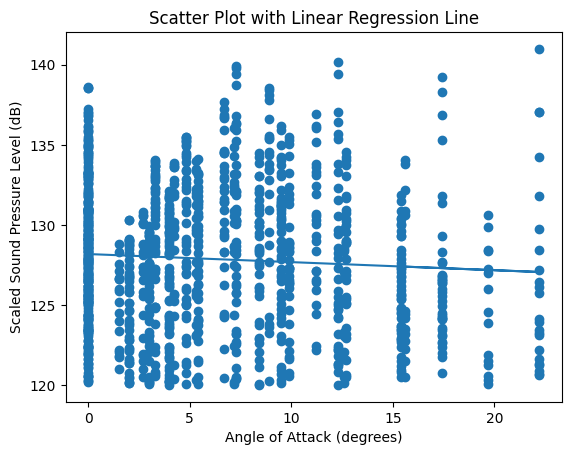

In [69]:
plt.scatter(X2_notsafe,Y2_notsafe)
plt.plot(X2_notsafe,reg2_notsafe.predict(X2_notsafe))
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [65]:
X3_notsafe = af_notsafe['Chord Length (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y3_notsafe = af_notsafe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg3_notsafe = LinearRegression()
reg3_notsafe.fit(X3_notsafe, Y3_notsafe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg3_notsafe.intercept_[0], reg3_notsafe.coef_[0][0]))

The linear model is: Y = 129.27 + -10.91X


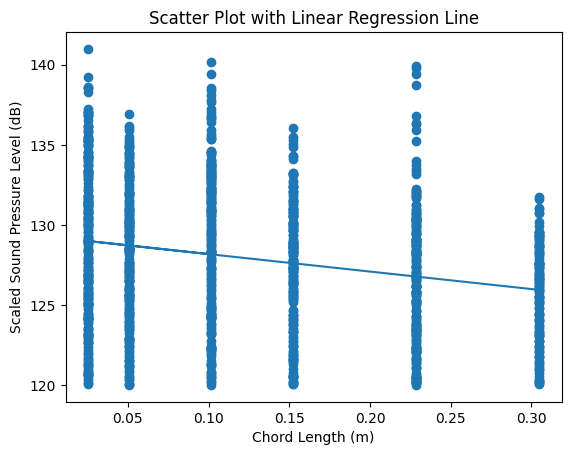

In [70]:
plt.scatter(X3_notsafe,Y3_notsafe)
plt.plot(X3_notsafe,reg3_notsafe.predict(X3_notsafe))
plt.xlabel('Chord Length (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [66]:
X4_notsafe = af_notsafe['Free-stream Velocity (m/s)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y4_notsafe = af_notsafe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg4_notsafe = LinearRegression()
reg4_notsafe.fit(X4_notsafe, Y4_notsafe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg4_notsafe.intercept_[0], reg4_notsafe.coef_[0][0]))

The linear model is: Y = 125.93 + 0.037624X


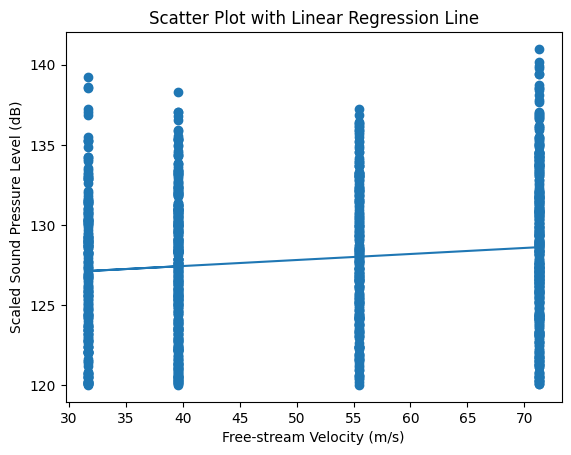

In [71]:
plt.scatter(X4_notsafe,Y4_notsafe)
plt.plot(X4_notsafe,reg4_notsafe.predict(X4_notsafe))
plt.xlabel('Free-stream Velocity (m/s)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

In [67]:
X5_notsafe = af_notsafe['Suction Side Displacement thickness (m)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y5_notsafe = af_notsafe['Scaled Sound Pressure Level (dB)'].values.reshape(-1,1)

reg5_notsafe = LinearRegression()
reg5_notsafe.fit(X5_notsafe, Y5_notsafe)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg5_notsafe.intercept_[0], reg5_notsafe.coef_[0][0]))

The linear model is: Y = 128.38 + -56.446X


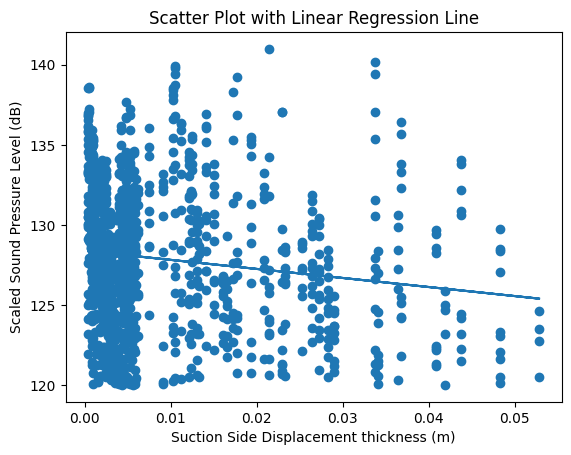

In [72]:
plt.scatter(X5_notsafe,Y5_notsafe)
plt.plot(X5_notsafe,reg5_notsafe.predict(X5_notsafe))
plt.xlabel('Suction Side Displacement thickness (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.title('Scatter Plot with Linear Regression Line');

### Part 2.2

For lab purposes, I will only examine the statistics of a couple of the regressions I plotted, but not all of them.

#### <u>Safe</u>

In [74]:
# This is for suction side displacement vs angle of attack (safe)

X3_safe2 = sm.add_constant(X3_safe)
est1_safe = sm.OLS(Y3_safe, X3_safe2)
est1_safe2 = est1_safe.fit()
print(est1_safe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     387.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           5.31e-59
Time:                        14:47:58   Log-Likelihood:                -1031.1
No. Observations:                 360   AIC:                             2066.
Df Residuals:                     358   BIC:                             2074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8121      0.321     11.869      0.0

In [77]:
# This is for frequency vs scaled sound pressure level (safe)

X4_safe2 = sm.add_constant(X4_safe)
est2_safe = sm.OLS(Y4_safe, X4_safe2)
est2_safe2 = est2_safe.fit()
print(est2_safe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     35.56
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           5.93e-09
Time:                        14:52:04   Log-Likelihood:                -954.40
No. Observations:                 360   AIC:                             1913.
Df Residuals:                     358   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.6392      0.300    388.675      0.0

In [78]:
# This is for suction side displacement vs scaled sound pressure level (safe)

X8_safe2 = sm.add_constant(X8_safe)
est3_safe = sm.OLS(Y8_safe, X8_safe2)
est3_safe2 = est3_safe.fit()
print(est3_safe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     32.56
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.42e-08
Time:                        14:52:08   Log-Likelihood:                -955.78
No. Observations:                 360   AIC:                             1916.
Df Residuals:                     358   BIC:                             1923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.2768      0.261    446.333      0.0

Notice that every p-value is significantly lower than 0.05. The models that I chose to look at for this portion of the lab actually fit the data fairly well according to those p-values, so that means linear regression could very well be useful for me.

#### <u>Not Safe</u>

In [79]:
# This is for frequency vs scaled sound pressure level (not safe)

X1_notsafe2 = sm.add_constant(X1_notsafe)
est1_notsafe = sm.OLS(Y1_notsafe, X1_notsafe2)
est1_notsafe2 = est1_notsafe.fit()
print(est1_safe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     387.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           5.31e-59
Time:                        14:58:12   Log-Likelihood:                -1031.1
No. Observations:                 360   AIC:                             2066.
Df Residuals:                     358   BIC:                             2074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8121      0.321     11.869      0.0

In [80]:
# This is for free-stream velocity vs scaled sound pressure level (not safe)

X4_notsafe2 = sm.add_constant(X4_notsafe)
est2_notsafe = sm.OLS(Y4_notsafe, X4_notsafe2)
est2_notsafe2 = est2_notsafe.fit()
print(est2_notsafe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     19.93
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           8.82e-06
Time:                        14:58:18   Log-Likelihood:                -3327.3
No. Observations:                1143   AIC:                             6659.
Df Residuals:                    1141   BIC:                             6669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.9304      0.453    277.811      0.0

In [81]:
# This is for suction side displacement vs scaled sound pressure level (safe)

X5_notsafe2 = sm.add_constant(X5_notsafe)
est3_notsafe = sm.OLS(Y5_notsafe, X5_notsafe2)
est3_notsafe2 = est3_notsafe.fit()
print(est3_notsafe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     22.17
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.80e-06
Time:                        14:58:26   Log-Likelihood:                -3326.2
No. Observations:                1143   AIC:                             6656.
Df Residuals:                    1141   BIC:                             6666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.3845      0.171    749.087      0.0

Similarly to the safe sets I tested. The sets I tested for not safe also all have really good p-values. Thus linear regression should be something useful for this data.

### 1 to 2 Paragraphs

The techniques used in this lab are basically plotting scatter plots (using the original data or subsets) and fitting a linear regression line into the scatter plot. On top of that we also used some prewritten code that looked at our data and gave us important values about our line of best fit, such as $R^2$ error, the $F$-statistic, and the $p$-value. Essentially, what we have done is plot our points using given information, and then we took a look at the data to see if there may be a correlation of some sort. In our case, it was evident for most plots that there would be no significant correlation, but nonetheless we still performed linear regression on a few of these data sets. This linear regression gave us the line that minimized the squared error between the line and the points themselves (with respect to the "output" value). After that was done, we cared about how well this line actually informs us about our data, so the prewritten code we utilized gave us two important values. The most important value is the $p$-value, and it tells us whether our model is statistically significant or not. All of the $p$-values that were seen in this lab were small enough to be significant. The other important value was the $R^2$ error, and in all of the labs it was not very good (they were either around 0.5 or were significantly lower than that) which means that our model doesn't inform us about the variance in data very well at all.